In [2]:
from dataclasses import dataclass
from typing import List, Dict, Optional


@dataclass
class Course:
    id: int
    naming: str
    modules: List[int]

    def __str__(self):
        return self.naming


@dataclass
class NetologyStudent:
    used_bot: bool
    name: str
    netology_id: int
    courses: List[Course]
    marks: Dict[int, List[Optional[int]]]


course_qa = Course(2, 'QA', [1, 2, 3])
course_design = Course(3, 'Design', [1, 2, 3, 4])
student_000 = NetologyStudent(False, 'Venya', 000,
                              [course_qa],
                              {course_qa.id: [4, 3, None]})

student_001 = NetologyStudent(True, 'Zhenya', 1, [course_qa],
                              {course_qa.id: [5, 5, 5]})

student_002 = NetologyStudent(True, 'Sasha', 2, [course_qa],
                              {course_qa.id: [None, None, None]})

student_003 = NetologyStudent(True, 'Sasha', 3, [course_design],
                              {course_design.id: [4, 4, None]})

student_004 = NetologyStudent(False, 'Kolya', 4, [course_design],
                              {course_design.id: [4, 3, 5]})

from typing import List

import numpy as np
from matplotlib import pyplot as plt

def build_full_course_effect(bot_used: List[NetologyStudent],
                             bot_unused: List[NetologyStudent]):
    """Visualyze effectivensess of bot usage"""

    # todo build bar chart by course
    # full list of courses
    courses = [course_qa, course_design]
    labels = [crs.naming for crs in courses]

    def get_mark_for_course_student(student: NetologyStudent, course: Course):
        """Getting average academic progress indicator"""
        all_marks = []
        for v in student.marks[course.id]:
            if v:
                all_marks.append(v)
        if not all_marks:
            return
        return sum(all_marks) / len(all_marks)



    def get_crs_mean_for_category(netology_user, crs):
        crs_means = []
        for s in netology_user:
            try:
                user_mean = get_mark_for_course_student(s, crs)
                if user_mean is None:
                    continue
                crs_means.append(user_mean)
            except KeyError:
                continue
        crs_mean = sum(crs_means) / len(crs_means)
        return crs_mean

    netology_bot_user_crs_means = [get_crs_mean_for_category(bot_used, crs)
                                   for crs in courses]
    netology_bot_unused_c_m = [get_crs_mean_for_category(bot_unused, crs) for crs in
                               courses]
    x = np.arange(len(labels))
    width = 0.35  # as 2 groups exists, 3 parts for brightness
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, netology_bot_user_crs_means, width, label='С Ботом')
    rects2 = ax.bar(x + width/2, netology_bot_unused_c_m, width, label='Без Бота')
    ax.set_ylabel('Средние оценки')
    ax.set_title('Оценки по направлениям с Ботом и без')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    # return plt
    plt.show()

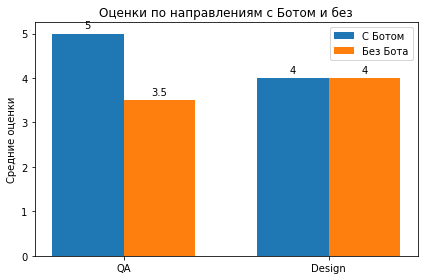

In [3]:
bot_users = [student_001, student_002, student_003]
unreflected = [student_000, student_004]

build_full_course_effect(bot_users, unreflected)